# OSP HW2

In [36]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [286]:
def read_hist(file_name, num_c = 1):
    df = pd.read_csv(file_name, sep="\t", header=None)
    if df.shape[1] == 2: # grayscale
        df.columns = ['intensity', 'density']
        df.set_index('intensity', inplace=True)
    else:
        df.columns = ['intensity', 'channel', 'density']
    return df

def read_func(file_name):
    df = pd.read_csv(file_name, sep="\t", header=None)
    if df.shape[1] == 2:
        df.columns = ['before', 'after']
    elif df.shape[1] == 3:
        df.columns = ['before', 'channel', 'after']
    else:
        print("파일 형식이 잘못됨.")
        return -1
    return df

def plot(df, title="PDF of an input image"):
    if df.shape[1] == 1: # grayscale
        df.plot(rot=45, kind='bar', xticks=[i for i in range(0,256,15)], title=title)
    else: # color
        groups = df.groupby('channel')

        fig, ax = plt.subplots(nrows=3, sharex=True, figsize=(6,15))
        rgb_dict = {0:'red', 1:'green', 2:'blue'}
        for idx, (name, group) in enumerate(groups):
            ax[idx].bar(group.intensity, group.density, label=rgb_dict[name], alpha=0.7, color=rgb_dict[name])

        ax[0].legend(fontsize=12, loc='upper right')
        
        plt.show()

def plot_func(func, title="s=T(r)"):
    if func.shape[1] == 2: # grayscale
        func.plot(x='before', y='after', color='black', linewidth=3, ylabel='after', legend=False, title=title)
    else: # color
        groups = func.groupby('channel')

        fig, ax = plt.subplots(nrows=3, sharex=True, figsize=(6,15))
        rgb_dict = {0:'red', 1:'green', 2:'blue'}

        for idx, (name, group) in enumerate(groups):
            ax[idx].plot(group.before, group.after, label=rgb_dict[name], color=rgb_dict[name], linewidth=3)
        
        ax[0].legend(fontsize=12, loc='upper left')
        plt.ylabel("after")
        plt.show()


## 1. PDF/CDF Generation

### PDF

In [264]:
pdf = read_hist("txt/PDF.txt")

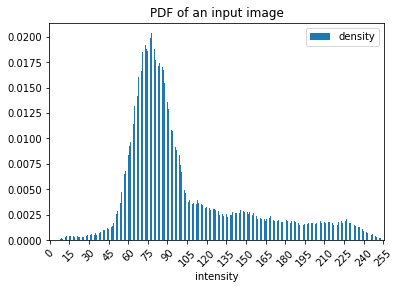

In [265]:
plot(pdf)

### CDF

In [266]:
cdf = read_hist("txt/CDF.txt")

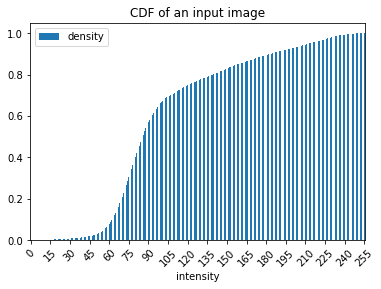

In [267]:
plot(cdf, "CDF of an input image")

## 2. Histogram Stretching

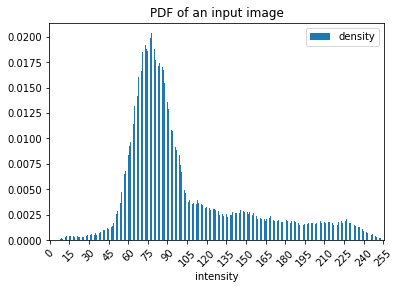

In [268]:
plot(pdf)

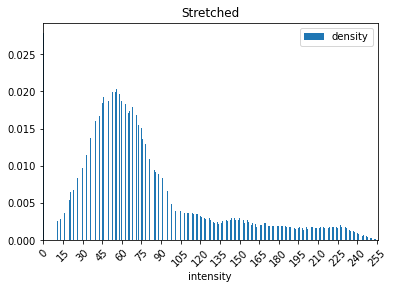

In [305]:
stretched = read_hist("txt/stretched_PDF.txt")
plot(stretched, "Stretched")

#### stretching function

In [270]:
st_func = read_func("txt/trans_func_stretch.txt")

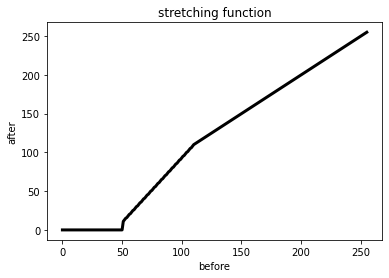

In [271]:
plot_func(st_func, "stretching function")

## 3. Histogram Equalization

### grayscale

In [272]:
equalized = read_hist("txt/equalized_PDF_gray.txt")

(None, None)

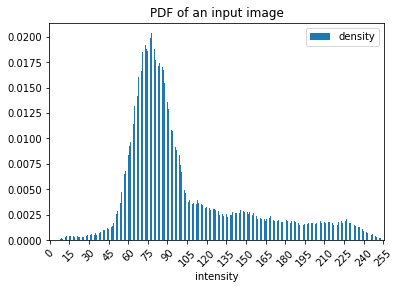

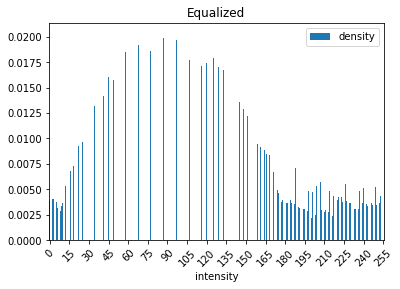

In [304]:
plot(pdf), plot(equalized, "Equalized")

#### transfer func

In [274]:
trans_func_eq = read_func("txt/trans_func_eq.txt")

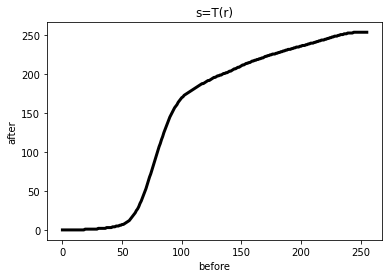

In [275]:
plot_func(trans_func_eq)

### rgb

In [280]:
pdf_rgb = read_hist("txt/PDF_RGB.txt", num_c = 3)

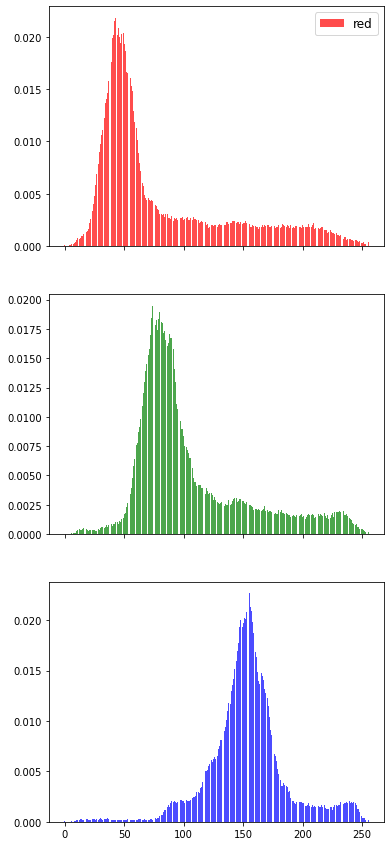

In [287]:
plot(pdf_rgb, title="RGB PDF")

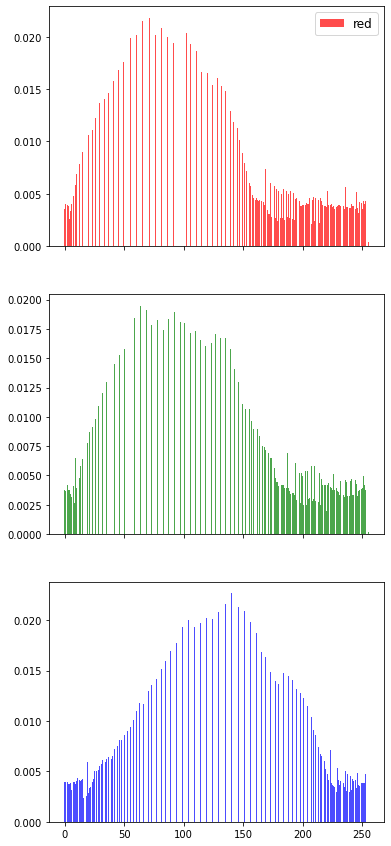

In [288]:
rgb_eq = read_hist("txt/equalized_PDF_RGB.txt")
plot(rgb_eq)

#### Transfer function

In [289]:
trans_func_eq_RGB = read_func("txt/trans_func_eq_RGB.txt")

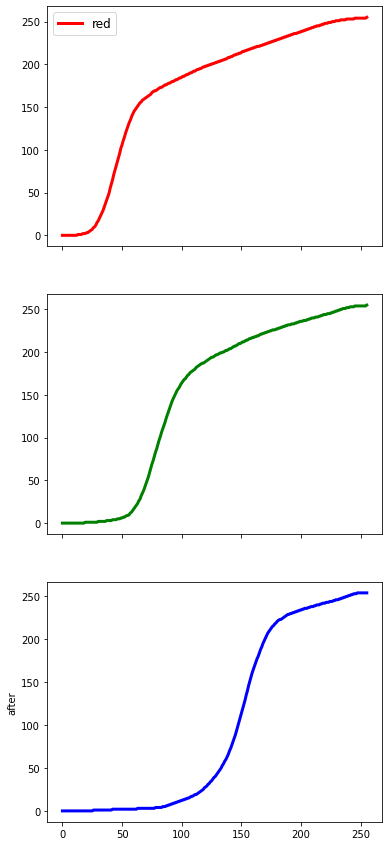

In [290]:
plot_func(trans_func_eq_RGB)

### YUV

In [291]:
yuv_eq = read_hist("txt/equalized_PDF_YUV.txt")

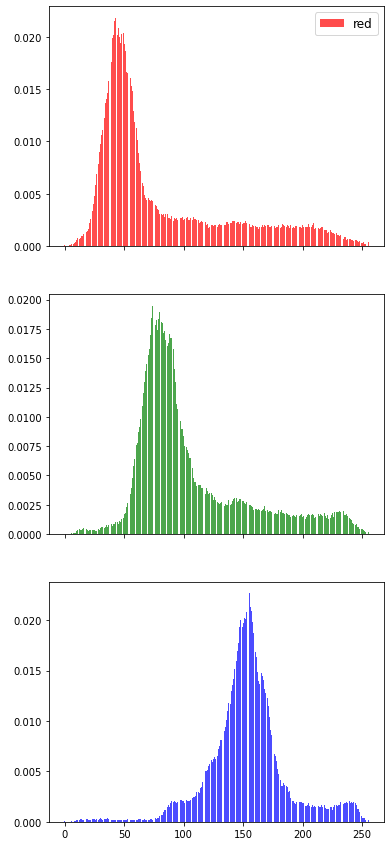

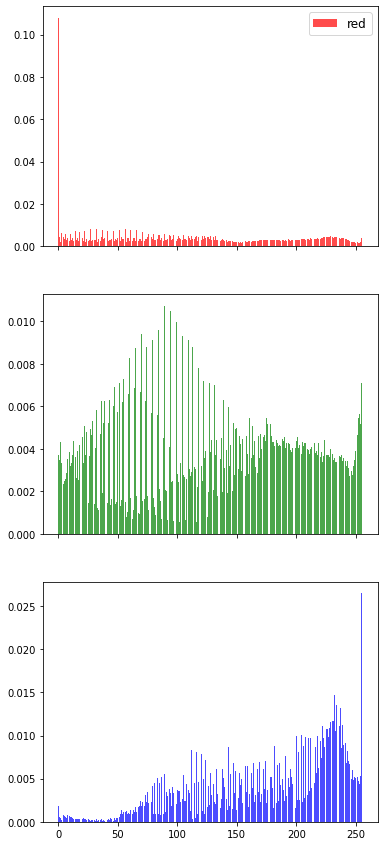

(None, None)

In [292]:
plot(pdf_rgb), plot(yuv_eq)

#### transfer function

In [293]:
trans_func_eq_YUV = read_func("txt/trans_func_eq_YUV.txt")

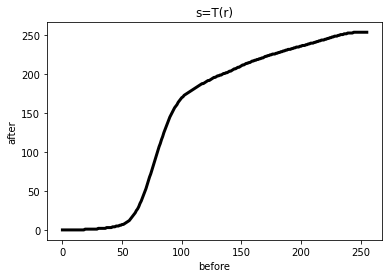

In [294]:
plot_func(trans_func_eq_YUV)

## 4. Histogram Matching

### grayscale

In [296]:
matched_pdf = read_hist("txt/matched_PDF_gray.txt")
trans_func_match = read_func("txt/trans_func_match.txt")

(None, None)

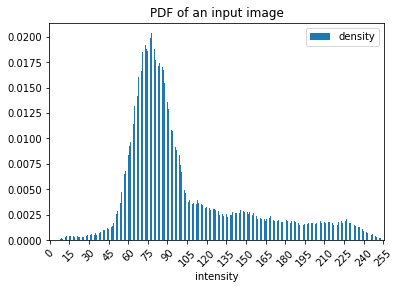

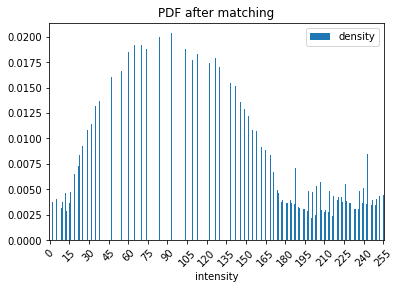

In [307]:
plot(pdf), plot(matched_pdf, "PDF after matching")

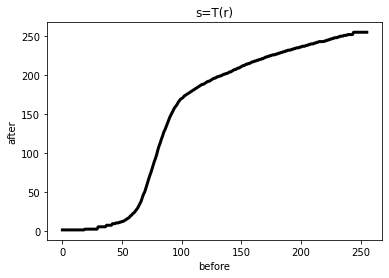

In [299]:
plot_func(trans_func_match)

### color

In [300]:
trans_func_match_color = read_func("txt/trans_func_match_color.txt")
matched_hist_color = read_hist("txt/matched_PDF_color.txt")

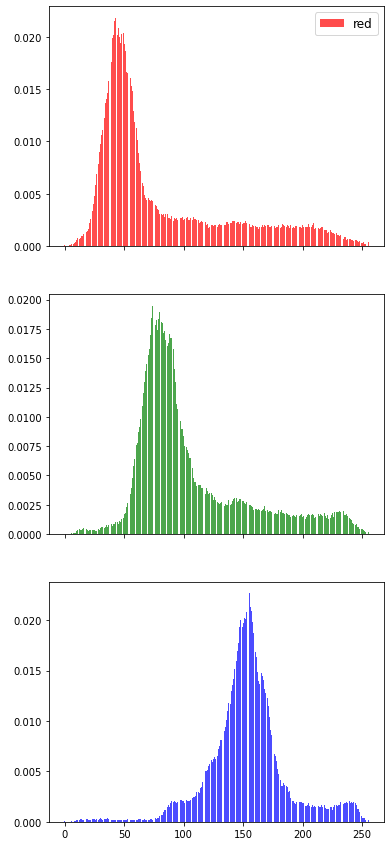

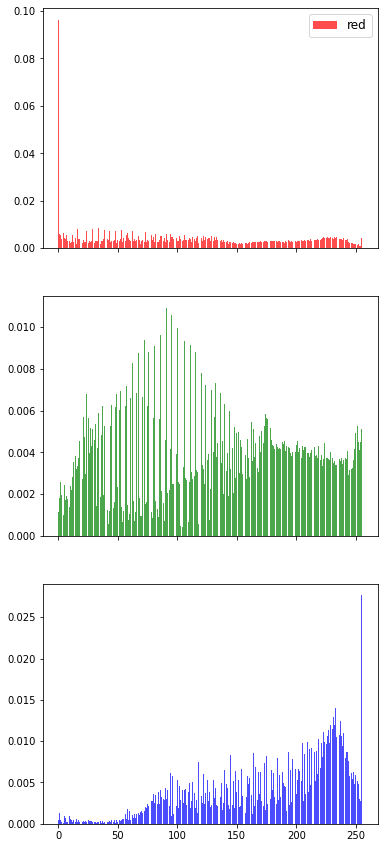

(None, None)

In [301]:
plot(pdf_rgb), plot(matched_hist_color)

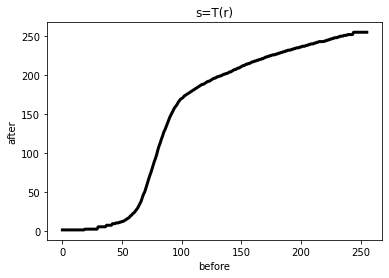

In [303]:
plot_func(trans_func_match_color)